<a href="https://colab.research.google.com/github/yuhki777/practice/blob/main/8%E7%AB%A0_%E6%95%B0%E5%80%A4%E3%82%B7%E3%83%9F%E3%83%A5%E3%83%AC%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3%E3%81%A7%E6%B6%88%E8%B2%BB%E8%80%85%E8%A1%8C%E5%8B%95%E3%82%92%E4%BA%88%E6%B8%AC%E3%81%99%E3%82%8B10%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 作業フォルダへの移動を行います。
# 人によって作業場所がことなるので、その場合作業場所を変更してください。
import os 
os.chdir('/content/drive/MyDrive/100knock-data_analytics/8章') #ここを変更。

# 8章 数値シミュレーションで消費者行動を予測する10本ノック

ここでは、消費者行動が口コミなどの情報伝播によってどのように変化していくかを分析する、  
人間関係のネットワーク構造を用いた数値シミュレーション手法を中心に学んでいきます。

### ノック71：人間関係のネットワークを可視化してみよう

In [ ]:
import pandas as pd

df_links = pd.read_csv("links.csv", index_col="Node")
df_links.head()

,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
Node,,,,,,,,,,,,,,,,,,,,
Node0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Node1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
Node2,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
Node3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
Node4,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0


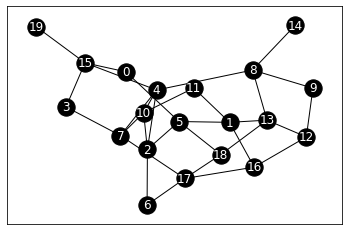

In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt 

G = nx.Graph()

NUM = len(df_links. index)
for i in range(NUM):
  node_no = df_links.columns[i].strip("Node")
  G.add_node(str(node_no))

for i in range(NUM):
  for j in range(NUM):
    node_name = "Node" + str(j)
    if df_links[node_name].iloc[i]==1:
      G.add_edge(str(i), str(j))

nx.draw_networkx(G, node_color="k", edge_color="k", font_color="w")
plt.show()

### ノック72：口コミによる情報伝播の様子を可視化してみよう

In [ ]:
import numpy as np

In [ ]:
def determine_link(percent):
  rand_val = np.random.rand()
  if rand_val<=percent:
    return 1
  else:
    return 0

In [ ]:
def simulate_percolation(num, list_active, percent_percolation):
  for i in range(num):
    if list_active[i]==1:
      for j in range(num):
        node_name ="Node" + str(j)
        if df_links[node_name].iloc[i]==1:
          if determine_link(percent_percolation)==1:
            list_active[j] = 1
  return list_active

In [ ]:
percent_percolation = 0.1
T_NUM =36
NUM = len(df_links. index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
  list_active = simulate_percolation(NUM, list_active, percent_percolation)
  list_timeSeries.append(list_active.copy())


In [ ]:
def active_node_coloring(list_active):
  list_color = []
  for i in range(len(list_timeSeries[t])):
    if list_timeSeries[t][i]==1:
      list_color.append("r")
    else:
      list_color.append("k")
  return list_color

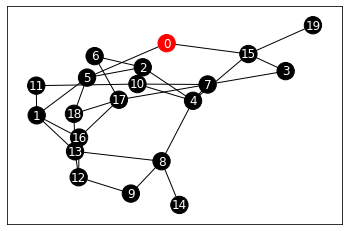

In [ ]:
t = 0
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

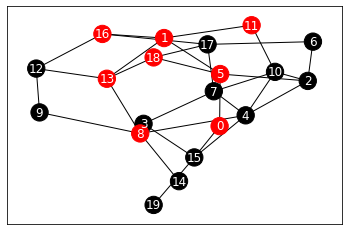

In [ ]:
t = 11
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

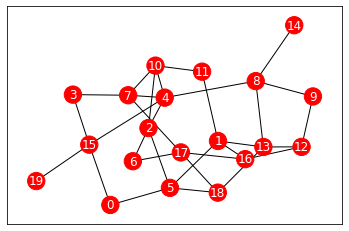

In [ ]:
t = 35
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

### ノック73：口コミ数の時系列変化をグラフ化してみよう

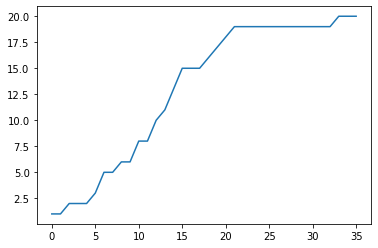

In [ ]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

### ノック74：会員数の時系列変化をシミュレーションしてみよう

In [ ]:
def simulate_population(num, list_active, percent_percolation, percent_disapparence, df_links):
  for i in range(num):
    if list_active[i]==1:
      for j in range(num):
        node_name = "Node" + str(j)
        if df_links[node_name].iloc[i]==1:
          if determine_link(percent_percolation)==1:
            list_active[j]=1

  for i in range(num):
    if determine_link(percent_disapparence)==1:
      list_active[i] = 0
  return list_active

In [ ]:
percent_percolation = 0.1
percent_disapparence = 0.05
T_NUM = 100
NUM = len(df_links. index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries =[]
for t in range(T_NUM):
  list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
  list_timeSeries.append(list_active.copy())

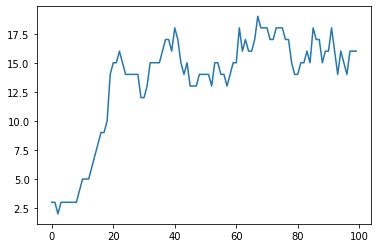

In [ ]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

In [ ]:
percent_disapparence = 0.2
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
  list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
  list_timeSeries.append(list_active.copy())

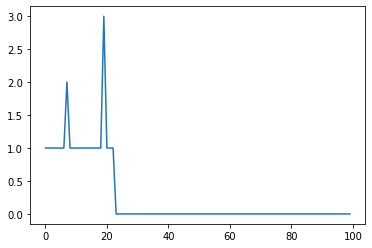

In [ ]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

### ノック75：パラメータの全体像を相図を見ながら把握しよう

In [ ]:
print("相図計算開始")
T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram,NUM_PhaseDiagram))
for i_p in range(NUM_PhaseDiagram):
    for i_d in range(NUM_PhaseDiagram):
        percent_percolation = 0.05*i_p
        percent_disapparence = 0.05*i_d
        list_active = np.zeros(NUM)
        list_active[0] = 1
        for t in range(T_NUM):
            list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
        phaseDiagram[i_p][i_d] = sum(list_active)
print(phaseDiagram)

相図計算開始
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 15. 15. 13. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19.  0. 16. 10. 16.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 17. 16.  0.  8. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 15. 17. 13.  0. 10.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 17. 18. 16. 17. 18.  9.  5.  9.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 18. 16. 13. 14.  0. 15.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19.  0. 18. 15. 11. 14. 13. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 18. 17. 11. 14. 15. 14. 11.  8. 10.  0.  0.  0. 

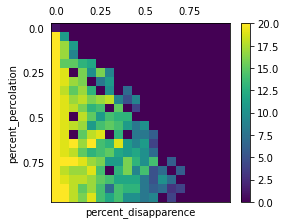

In [ ]:
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel('percent_disapparence')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
plt.show()

### ノック76：実データを読み込んでみよう

In [ ]:
df_mem_links = pd.read_csv("links_members.csv", index_col="Node")
df_mem_info = pd.read_csv("info_members.csv", index_col="Node")
df_mem_links.head()

,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
Node,,,,,,,,,,,,,,,,,,,,,
Node0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Node1,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
Node2,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
Node3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Node4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


### ノック77：リンク数の分布を可視化しよう

In [ ]:
NUM = len(df_mem_links.index)
array_linkNum = np.zeros(NUM)
for i in range(NUM):
    array_linkNum[i] = sum(df_mem_links["Node"+str(i)])

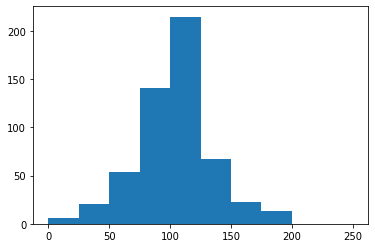

In [ ]:
plt.hist(array_linkNum, bins=10,range=(0,250))
plt.show()

### ノック78：シミュレーションのために実データからパラメータを推定しよう

In [ ]:
NUM = len(df_mem_info. index)
T_NUM = len(df_mem_info.columns)-1

count_active = 0
count_active_to_inactive = 0
for t in range(T_NUM):
  for i in range(NUM):
    if (df_mem_info.iloc[i][t]==1):
      count_active_to_inactive += 1
      if (df_mem_info.iloc[i][t+1]==0):
        count_active += 1
estimated_percent_disapparence =count_active/count_active_to_inactive

In [ ]:
count_link = 0
count_link_to_active = 0
count_link_temp = 0
for t in range(T_NUM):
    df_link_t = df_mem_info[df_mem_info[str(t)]==1]
    temp_flag_count = np.zeros(NUM)
    for i in range(len(df_link_t.index)):
        index_i = int(df_link_t.index[i].replace("Node",""))
        df_link_temp = df_mem_links[df_mem_links["Node"+str(index_i)]==1]
        for j in range(len(df_link_temp.index)):
            index_j = int(df_link_temp.index[j].replace("Node",""))
            if (df_mem_info.iloc[index_j][t]==0):
                if (temp_flag_count[index_j]==0):
                    count_link += 1
                if (df_mem_info.iloc[index_j][t+1]==1):
                    if (temp_flag_count[index_j]==0):
                        temp_flag_count[index_j] = 1 
                        count_link_to_active += 1
estimated_percent_percolation = count_link_to_active/count_link

In [ ]:
estimated_percent_disapparence

0.10147163541419416

In [ ]:
estimated_percent_percolation

0.039006364196263604

### ノック79：実データとシミュレーションを比較しよう

In [ ]:
percent_percolation = 0.039006364196263604
percent_disapparence = 0.10147163541419416
T_NUM = 24
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
  list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_mem_links)
  list_timeSeries.append(list_active.copy())

In [ ]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

In [ ]:
T_NUM = len(df_mem_info.columns)-1
list_timeSeries_num_real =[]
for t in range(0,T_NUM):
  list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)]==1].index))


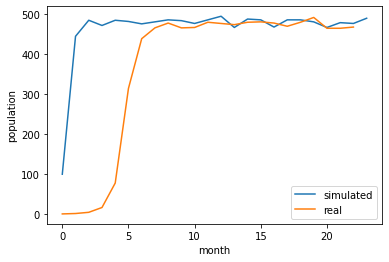

In [ ]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.plot(list_timeSeries_num_real, label = 'real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()

### ノック80：シミュレーションによる将来予測を実施しよう

In [ ]:
percent_percolation = 0.039006364196263604
percent_disapparence = 0.10147163541419416
T_NUM = 36
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_mem_links)
    list_timeSeries.append(list_active.copy())

In [ ]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

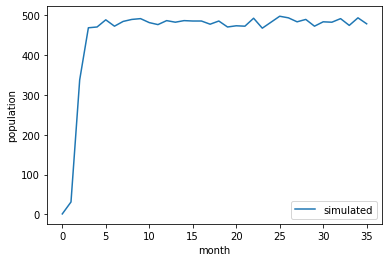

In [ ]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()